In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

/Users/nick/Documents/codebase/qiskit-ibm-runtime/qiskit_ibm_runtime/__init__.py:208: UserWarning: You are using the experimental-0.2 branch. Stability is not guaranteed.
  warnings.warn("You are using the experimental-0.2 branch. Stability is not guaranteed.")


In [2]:
service = QiskitRuntimeService()

In [ ]:
jobs = service.jobs(session_id='cqb0670tzeqg008v2a2g', descending=False)

In [ ]:
job = service.job('cqb0670tzeqg008v2a30')

In [ ]:
inputs = job.inputs

In [ ]:
inputs['circuits'][-1].draw('mpl', style='iqp', idle_wires=False)

In [ ]:
from qiskit import qpy

In [ ]:
with open('test.qpy', 'wb') as handle:
    qpy.dump(inputs['circuits'][-1], handle)

In [ ]:
with open('test.qpy', 'rb') as handle:
    qc = qpy.load(handle)

qc[0].draw('mpl', style='iqp', idle_wires=False)

In [ ]:
result = job.result()

In [3]:
from qiskit.circuit import QuantumCircuit

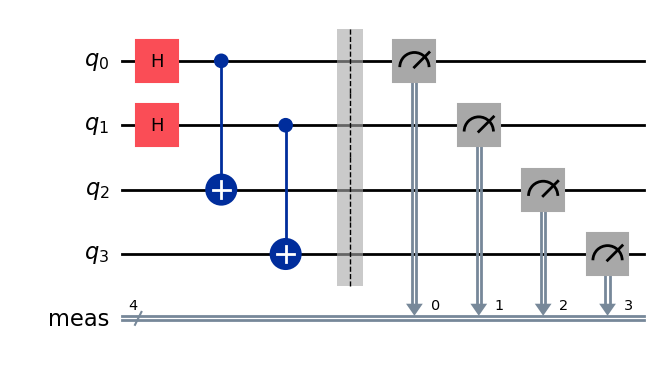

In [4]:
qc = QuantumCircuit(4)
qc.h([0, 1])
qc.cx(0, 2)
qc.cx(1, 3)
qc.measure_all()
qc.draw('mpl', style='iqp')

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2

# from qiskit.primitives import Sampler

In [7]:
backend = service.backend('ibm_cairo')
target = backend.target
sampler = SamplerV2(backend=backend)
pm = generate_preset_pass_manager(2, target=target)

In [9]:
qc_isa = pm.run(qc)
job = sampler.run([(qc_isa)], shots=10000)
print(job.job_id())

cqk2s0c59d1g008jz7cg


In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().quasi_dists[0].binary_probabilities())

In [ ]:
from qiskit.result import marginal_counts

plot_histogram(marginal_counts(job.result().quasi_dists[0].binary_probabilities(), indices=[0, 2]))

In [ ]:
plot_histogram(marginal_counts(job.result().quasi_dists[0].binary_probabilities(), indices=[0, 1]))